# Using `DataFrameFileToDocument` with `dataframe-haystack`

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/EdAbati/dataframes-haystack/blob/main/notebooks/dataframe-file-to-doc-example.ipynb)


In [1]:
# when running in Google Colab (or similar), install the following packages
# !pip install dataframe-haystack arxiv 'polars[timezone]' pyarrow

## Downloading the dataset

We are using a dataset that contains abstracts of papers uploaded on arXiv. We are using the arXiv API to get the data.

In [2]:
# we import polars just to create and store an example dataframe
import polars as pl


def get_arxiv_data(search_query: str, max_num_rows: int = 10) -> pl.DataFrame:
    """Get data using the arXiv API."""
    import arxiv

    arxiv_client = arxiv.Client()

    search = arxiv.Search(query=search_query, max_results=max_num_rows, sort_by=arxiv.SortCriterion.Relevance)
    results_list = [
        {
            "title": result.title,
            "authors": [author.name for author in result.authors],
            "summary": result.summary,
            "published": result.published,
            "primary_category": result.primary_category,
            "categories": result.categories,
            "pdf_url": result.pdf_url,
            "entry_id": result.entry_id,
        }
        for result in arxiv_client.results(search)
    ]
    return pl.DataFrame(results_list)

We will have a dataset of 10 rows with papers about LLMs.

In [3]:
df = get_arxiv_data("llm", max_num_rows=10)
df.head()

title,authors,summary,published,primary_category,categories,pdf_url,entry_id
str,list[str],str,"datetime[μs, UTC]",str,list[str],str,str
"""Large Language Models as Softw…","[""Irene Weber""]","""Large Language Models (LLMs) h…",2024-06-13 21:32:56 UTC,"""cs.SE""","[""cs.SE"", ""cs.CL"", … ""A.1; I.2.7; D.2.11""]","""http://arxiv.org/pdf/2406.1030…","""http://arxiv.org/abs/2406.1030…"
"""Parrot: Efficient Serving of L…","[""Chaofan Lin"", ""Zhenhua Han"", … ""Lili Qiu""]","""The rise of large language mod…",2024-05-30 09:46:36 UTC,"""cs.LG""","[""cs.LG"", ""cs.AI""]","""http://arxiv.org/pdf/2405.1988…","""http://arxiv.org/abs/2405.1988…"
"""A Survey of Large Language Mod…","[""Zibin Zheng"", ""Kaiwen Ning"", … ""Jiachi Chen""]","""General large language models …",2023-11-17 07:55:16 UTC,"""cs.SE""","[""cs.SE""]","""http://arxiv.org/pdf/2311.1037…","""http://arxiv.org/abs/2311.1037…"
"""A Survey of Large Language Mod…","[""Wenbo Shang"", ""Xin Huang""]","""A graph is a fundamental data …",2024-04-23 07:39:24 UTC,"""cs.CL""","[""cs.CL"", ""cs.AI"", ""cs.DB""]","""http://arxiv.org/pdf/2404.1480…","""http://arxiv.org/abs/2404.1480…"
"""TEST: Text Prototype Aligned E…","[""Chenxi Sun"", ""Hongyan Li"", … ""Shenda Hong""]","""This work summarizes two ways …",2023-08-16 09:16:02 UTC,"""cs.CL""","[""cs.CL"", ""cs.AI""]","""http://arxiv.org/pdf/2308.0824…","""http://arxiv.org/abs/2308.0824…"


Saving the data in a temporary file.

In [4]:
import tempfile

# create a temporary parquet file
temp_file_parquet = tempfile.NamedTemporaryFile(delete=False, suffix=".parquet")

# write the dataframe to the temporary file
with open(temp_file_parquet.name, "w") as f:
    df.write_parquet(f)

## Loading the data in `haystack`

We can read the data and convert the rows into `Document`s using the `DataFrameFileToDocument` component. It can be used to convert a DataFrame into a list of `Document`s.

In [5]:
from dataframes_haystack.components.converters import DataFrameFileToDocument

/Users/edoardoabati/Library/Application Support/hatch/env/virtual/dataframes-haystack/Gal9cSh8/dataframes-haystack/lib/python3.8/site-packages/haystack/core/errors.py:34: DeprecationWarning: PipelineMaxLoops is deprecated and will be remove in version '2.7.0'; use PipelineMaxComponentRuns instead.
  warnings.warn(


In [6]:
file_converter = DataFrameFileToDocument(
    content_column="summary",
    meta_columns=["title", "authors", "published", "primary_category", "categories", "pdf_url"],
    file_format="parquet",
    backend="polars",
)

In [7]:
file_converter.run(file_paths=[temp_file_parquet.name])

{'documents': [Document(id=b550a0163e880995f1895a14ae3410ef88bb9d312bd69a149c125a2d9087afe1, content: 'Large Language Models (LLMs) have become widely adopted recently. Research
  explores their use both a...', meta: {'title': 'Large Language Models as Software Components: A Taxonomy for LLM-Integrated Applications', 'authors': ['Irene Weber'], 'published': datetime.datetime(2024, 6, 13, 21, 32, 56, tzinfo=backports.zoneinfo.ZoneInfo(key='UTC')), 'primary_category': 'cs.SE', 'categories': ['cs.SE', 'cs.CL', 'cs.LG', 'A.1; I.2.7; D.2.11'], 'pdf_url': 'http://arxiv.org/pdf/2406.10300v1'}),
  Document(id=fc64aeb2ac791e14cd3e1ec24d74bee04ce2c8cb8428e70fb040cafbab76365e, content: 'The rise of large language models (LLMs) has enabled LLM-based applications
  (a.k.a. AI agents or co-...', meta: {'title': 'Parrot: Efficient Serving of LLM-based Applications with Semantic Variable', 'authors': ['Chaofan Lin', 'Zhenhua Han', 'Chengruidong Zhang', 'Yuqing Yang', 'Fan Yang', 'Chen Chen', 'Lili Qiu

If we want to use a column of the dataframe as unique identifier for documents, we can set the `index_column` parameter.

In [8]:
file_converter = DataFrameFileToDocument(
    content_column="summary",
    meta_columns=["title", "authors", "published", "primary_category", "categories", "pdf_url"],
    index_column="entry_id",
    file_format="parquet",
    backend="polars",
)
file_converter.run(file_paths=[temp_file_parquet.name])

{'documents': [Document(id=http://arxiv.org/abs/2406.10300v1, content: 'Large Language Models (LLMs) have become widely adopted recently. Research
  explores their use both a...', meta: {'title': 'Large Language Models as Software Components: A Taxonomy for LLM-Integrated Applications', 'authors': ['Irene Weber'], 'published': datetime.datetime(2024, 6, 13, 21, 32, 56, tzinfo=backports.zoneinfo.ZoneInfo(key='UTC')), 'primary_category': 'cs.SE', 'categories': ['cs.SE', 'cs.CL', 'cs.LG', 'A.1; I.2.7; D.2.11'], 'pdf_url': 'http://arxiv.org/pdf/2406.10300v1'}),
  Document(id=http://arxiv.org/abs/2405.19888v1, content: 'The rise of large language models (LLMs) has enabled LLM-based applications
  (a.k.a. AI agents or co-...', meta: {'title': 'Parrot: Efficient Serving of LLM-based Applications with Semantic Variable', 'authors': ['Chaofan Lin', 'Zhenhua Han', 'Chengruidong Zhang', 'Yuqing Yang', 'Fan Yang', 'Chen Chen', 'Lili Qiu'], 'published': datetime.datetime(2024, 5, 30, 9, 46, 36, tzi

If you want to use `pandas` as the backend to read the data, you can set `backend="pandas"`.

In [9]:
pandas_file_converter = DataFrameFileToDocument(
    content_column="summary",
    meta_columns=["title", "authors", "published", "primary_category", "categories", "pdf_url"],
    index_column="entry_id",
    file_format="parquet",
    backend="pandas",
)
pandas_file_converter.run(file_paths=[temp_file_parquet.name])

{'documents': [Document(id=http://arxiv.org/abs/2406.10300v1, content: 'Large Language Models (LLMs) have become widely adopted recently. Research
  explores their use both a...', meta: {'title': 'Large Language Models as Software Components: A Taxonomy for LLM-Integrated Applications', 'authors': array(['Irene Weber'], dtype=object), 'published': Timestamp('2024-06-13 21:32:56+0000', tz='UTC'), 'primary_category': 'cs.SE', 'categories': array(['cs.SE', 'cs.CL', 'cs.LG', 'A.1; I.2.7; D.2.11'], dtype=object), 'pdf_url': 'http://arxiv.org/pdf/2406.10300v1'}),
  Document(id=http://arxiv.org/abs/2405.19888v1, content: 'The rise of large language models (LLMs) has enabled LLM-based applications
  (a.k.a. AI agents or co-...', meta: {'title': 'Parrot: Efficient Serving of LLM-based Applications with Semantic Variable', 'authors': array(['Chaofan Lin', 'Zhenhua Han', 'Chengruidong Zhang', 'Yuqing Yang',
         'Fan Yang', 'Chen Chen', 'Lili Qiu'], dtype=object), 'published': Timestamp('2024

### Using the components in a pipeline

In [10]:
from haystack import Pipeline
from haystack.components.writers import DocumentWriter
from haystack.document_stores.in_memory import InMemoryDocumentStore

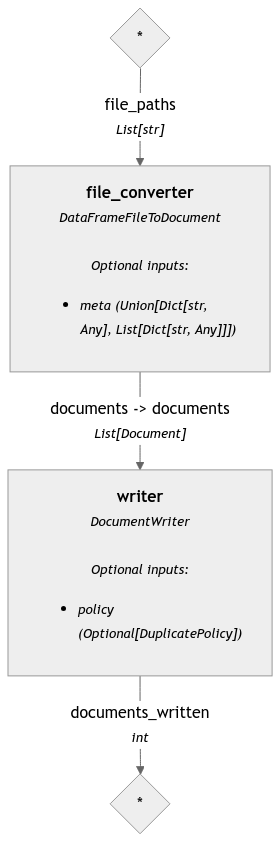

In [11]:
document_store = InMemoryDocumentStore()

indexing = Pipeline()
indexing.add_component(
    "file_converter",
    DataFrameFileToDocument(
        content_column="summary",
        meta_columns=["title", "authors", "published", "primary_category", "categories", "pdf_url"],
        index_column="entry_id",
        file_format="parquet",
        backend="polars",
    ),
)
indexing.add_component("writer", DocumentWriter(document_store))
indexing.connect("file_converter", "writer")
indexing.show()

In [12]:
indexing.run({"file_converter": {"file_paths": [temp_file_parquet.name]}})

{'writer': {'documents_written': 10}}

Saving the data in a temporary file.

In [13]:
# Cleanup
# delete the temporary file
from pathlib import Path

Path(temp_file_parquet.name).unlink()